## Improving a model

First prediction = baseline prediction
First model = baseline model

From data perspective:
* Could we collect more data. (generally,the more data, the better)
* Can we improve data? (adding more reliable features)

From a model perspective:
* Is there a better model we can use?  (Refer - sklearn ml map)
* Could we imporove our model?  (Tuning Hyperparameters)

Parameters vs HyperParameters
* Parameters :- model find these patterns
* Hyperparameters :- settings on model we can adjust(potentially) to improve its ability to find patterns

Three ways to adjust Hyperparameters:-
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Hyperparameters to tune:-
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_pred labels 
    on a classification model.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy' : round(accuracy,2), 
                   'precision' : round(precision,2),
                   'recall' : round(recall,2),
                   'f1' : round(f1,2)}
    print(f'Acc : {accuracy *100:.2f}%')
    print(f'Precision : {precision *100:.2f}%')
    print(f'Recall : {recall *100.:2f}%')
    print(f'F1 : {f1 *100:.2f}%')
    
    return metric_dict

In [6]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
heart_disease_shuffled = heart_disease.sample(frac = 1)
heart_disease_shuffled

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
155   58    0   0       130   197    0        1      131      0      0.6   
28    65    0   2       140   417    1        0      157      0      0.8   
10    54    1   0       140   239    0        1      160      0      1.2   
296   63    0   0       124   197    0        1      136      1      0.0   
221   55    1   0       140   217    0        1      111      1      5.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
132   42    1   1       120   295    0        1      162      0      0.0   
26    59    1   2       150   212    1        1      157      0      1.6   
199   65    1   0       110   248    0        0      158      0      0.6   
17    66    0   3       150   226    0        1      114      0      2.6   
8     52    1   2       172   199    1        1      162      0      0.5   

     slope  ca  thal  target  
155      1   0     2       1  
28       2   1     2       1  
10       2   0     2       1  
296      1   0     2       0  
221      0   0     3       0  
..     ...  ..   ...     ...  
132      2   0     2       1  
26       2   0     2       1  
199      2   2     1       0  
17       0   0     2       1  
8        2   0     3       1  

[303 rows x 14 columns]

## Tuning Hyperparameters By Hand

In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(9)

X = heart_disease_shuffled.drop('target',axis = 1)
y = heart_disease_shuffled['target']

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))

X_train, y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_valid)

baseline_metrices = evaluate_preds(y_valid,y_preds)
baseline_metrices

Acc : 80.00%
Precision : 81.48%
Recall : 84.615385%
F1 : 83.02%


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.85, 'f1': 0.83}

In [9]:
clf_2 = RandomForestClassifier(max_depth=20)
clf_2.fit(X_train,y_train)
y_preds_2 = clf_2.predict(X_valid)

clf_2_metrices = evaluate_preds(y_valid,y_preds_2)
clf_2_metrices

Acc : 84.44%
Precision : 85.19%
Recall : 88.461538%
F1 : 86.79%


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.87}

## Tuning Hyperparameters By RandomSearchCV

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
grid = {'n_estimators' : [10,100,200,500,1000,1200],
        'max_depth' : [None,5,10,20,30],
        'max_features' : ['auto','sqrt'],
        'min_samples_split' : [2,4,6],
        'min_samples_leaf' : [1,2,4]}

np.random.seed(9)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter = 10, #number of models to try
                            cv=5, verbose=2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=500, min_samples_split=4,

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   55.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [11]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [12]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrices = evaluate_preds(y_test,rs_y_preds)
rs_metrices

Acc : 88.52%
Precision : 82.35%
Recall : 96.551724%
F1 : 88.89%


{'accuracy': 0.89, 'precision': 0.82, 'recall': 0.97, 'f1': 0.89}

## Tuning Hyperparameters By GridSearchCV

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
grid_2 = {'n_estimators' : [10,100,200],
        'max_depth' : [30],
        'max_features' : ['auto','sqrt'],
        'min_samples_split' : [4],
        'min_samples_leaf' : [2,4]}

np.random.seed(9)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5, verbose=2)
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    9.0s finished


In [14]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrices = evaluate_preds(y_test,gs_y_preds)
gs_metrices

Acc : 88.52%
Precision : 82.35%
Recall : 96.551724%
F1 : 88.89%


{'accuracy': 0.89, 'precision': 0.82, 'recall': 0.97, 'f1': 0.89}

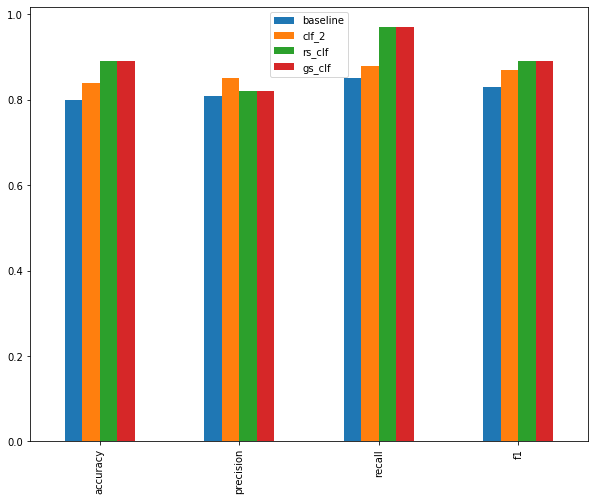

In [15]:
compare_metric = pd.DataFrame({'baseline':baseline_metrices,
                               'clf_2' : clf_2_metrices,
                               'rs_clf' : rs_metrices,
                               'gs_clf' : gs_metrices})

compare_metric.plot.bar(figsize = (10,8))

# Saving and loading a Machine learning model

Two ways of saving and loading a model:-
1. With Python's `pickle` module.
2. With `joblib` module.

**Pickle**

In [17]:
import pickle

pickle.dump(gs_clf,open('gs_random_forest_classifier.pkl -1','wb'))

In [18]:
loaded_gs_clf = pickle.load(open('gs_random_forest_classifier.pkl -1','rb'))

In [20]:
preds_1 = loaded_gs_clf.predict(X_test)

pred_1_metrices = evaluate_preds(y_test,preds_1)
pred_1_metrices

Acc : 88.52%
Precision : 82.35%
Recall : 96.551724%
F1 : 88.89%


{'accuracy': 0.89, 'precision': 0.82, 'recall': 0.97, 'f1': 0.89}

**joblib**

In [24]:
from joblib import dump,load

dump(gs_clf, filename='gs_random_forest_classifier.joblib-2')

['gs_random_forest_classifier.joblib-2']

In [26]:
loaded_gs_clf_2 = load(filename='gs_random_forest_classifier.joblib-2')

In [27]:
preds_2 = loaded_gs_clf_2.predict(X_test)

pred_2_metrices = evaluate_preds(y_test,preds_2)
pred_2_metrices

Acc : 88.52%
Precision : 82.35%
Recall : 96.551724%
F1 : 88.89%


{'accuracy': 0.89, 'precision': 0.82, 'recall': 0.97, 'f1': 0.89}